In [2]:
import pandas as pd
import matplotlib.pyplot as plt

     ml    mAU  ml.1   mS/cm  ml.2     %  ml.3     %B  ml.4   MPa  ml.5  \
0  0.00   8.60  0.00   23.56  0.00  23.6  0.00    0.0  0.00  0.04  0.00   
1  0.05  10.48  0.05   23.17  0.05  23.2  0.05  100.0  0.05  0.81  0.05   
2  0.10  11.76  0.10   23.32  0.10  23.3  0.10  100.0  0.10  0.88  0.10   
3  0.15  11.62  0.15   23.31  0.15  23.3  0.15  100.0  0.15  0.96  0.15   
4  0.20  11.60  0.21   23.23  0.21  23.2  0.21  100.0  0.21  1.47  0.21   

    ml/min  ml.6   øC  ml.7 (Fractions)  ml.8  (Injections)  ml.9  \
0      0.2  0.00  9.1  5.89           1   0.0           3.0   0.0   
1      0.2  0.06  9.1  6.39           2   NaN           NaN   0.0   
2      0.2  0.12  9.1  6.89           3   NaN           NaN   0.0   
3      0.4  0.19  9.0  7.39           4   NaN           NaN   0.0   
4      0.4  0.25  9.0  7.89           5   NaN           NaN   0.0   

                                         (Set Marks)  
0  Manual Run 18.02.2025, 21:33:49 W. Europe Stan...  
1                 User d

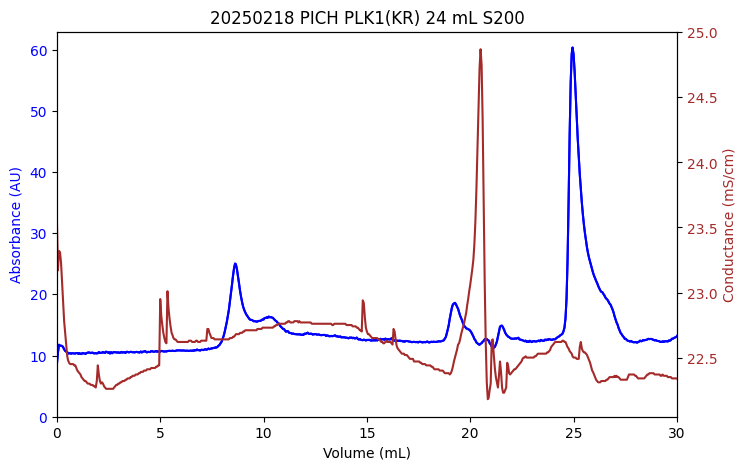

In [25]:
#loading data, and checking it here
df = pd.read_csv('20250218 PICH PLK1(KR) 24 mL S200 raw.csv', skiprows=2)
print(df.head())

fig, ax1 = plt.subplots(figsize=(8,5))

#1st axis: absorbance
ax1.plot(df['ml'], df[' mAU'], label='Absorbance (mAU)', color='blue')
ax1.set_xlabel('Volume (mL)')
ax1.set_ylabel('Absorbance (AU)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_title('20250218 PICH PLK1(KR) 24 mL S200')

#2nd axis: conductance
ax2 = ax1.twinx()
ax2.plot(df['ml'], df[' mS/cm'], color='brown', label='Conductance (mS/cm)')
ax2.set_ylabel('Conductance (mS/cm)', color='brown')
ax2.tick_params(axis='y', labelcolor='brown')

#shade area under the curve:
x = df['ml']
y = df[' mAU']
ax1.plot(x, y, label='Absorbance (mAU)', color='blue')

#make sure theres no edge gap
ax1.set_xlim(left=0)
ax1.set_xlim(0, 30)
ax1.set_ylim(bottom=0)

plt.show()

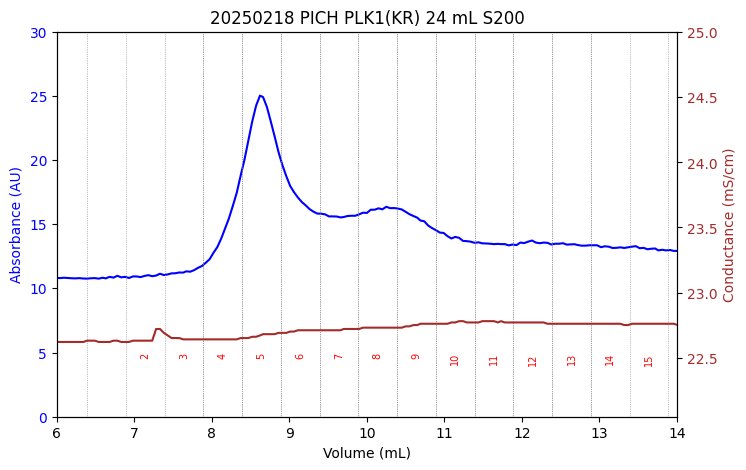

In [40]:
fig, ax1 = plt.subplots(figsize=(8,5))

#1st axis: absorbance
ax1.plot(df['ml'], df[' mAU'], label='Absorbance (mAU)', color='blue')
ax1.set_xlabel('Volume (mL)')
ax1.set_ylabel('Absorbance (AU)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_title('20250218 PICH PLK1(KR) 24 mL S200')

#2nd axis: conductance
ax2 = ax1.twinx()
ax2.plot(df['ml'], df[' mS/cm'], color='brown', label='Conductance (mS/cm)')
ax2.set_ylabel('Conductance (mS/cm)', color='brown')
ax2.tick_params(axis='y', labelcolor='brown')

#make sure theres no edge gap
ax1.set_xlim(left=0)
ax1.set_xlim(6, 14)
ax1.set_ylim(0,30)

#adding fraction labels
# Adding fraction labels only within a specific volume range
for i, row in df.iterrows():
    if (
        pd.notna(row['ml.7']) and 
        row['(Fractions)'] != '' and 
        6 <= row['ml.7'] <= 13   # Limit to 60–100 mL
    ):
        start = row['ml.7']
        end = start + 1.5  # assuming fraction width is 1.5 mL
        center = (start + end) / 2

        # Draw vertical boundary lines
        ax1.axvline(start, color='gray', linestyle=':', linewidth=0.5)
        ax1.axvline(end, color='gray', linestyle=':', linewidth=0.5)

        # Add label between the lines
        ax1.text(
            center,
            5,  # adjust Y as needed
            row['(Fractions)'],
            rotation=90,
            ha='center',
            va='top',
            fontsize=7,
            color='red',
            clip_on=False
        )
        
plt.show()